# ws 07

- download xls data (Online Retail.xlxs)  from : https://archive.ics.uci.edu/ml/machine-learning-databases/00352/

In [4]:
!pip install tqdm
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm 
from gensim.models import Word2Vec 
from gensim.models.callbacks import CallbackAny2Vec   

In [6]:
cols = 'a:d, g' #['a:d,']

df = pd.read_excel('Online Retail.xlsx', usecols=cols, 
                   dtype={'CustomerID':str,'InvoiceNo':str})  

In [7]:
df = pd.read_excel('Online Retail.xlsx')

# Explore

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
472379,576686,22689,DOORMAT MERRY CHRISTMAS RED,1,2011-11-16 12:08:00,8.25,16916.0,United Kingdom
416353,572552,22991,GIRAFFE WOODEN RULER,4,2011-10-24 17:07:00,4.13,14096.0,United Kingdom
490427,578054,85123A,WHITE HANGING HEART T-LIGHT HOLDER,160,2011-11-22 14:59:00,2.55,14911.0,EIRE
475918,576927,22580,ADVENT CALENDAR GINGHAM SACK,3,2011-11-17 11:02:00,5.95,12567.0,France
516681,579941,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-01 10:31:00,0.29,16496.0,United Kingdom


In [10]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df[df.Quantity < 0].count()
df.groupby('Quantity').size()

Quantity
-80995    1
-74215    1
-9600     2
-9360     1
-9058     1
         ..
 4800     1
 5568     1
 12540    1
 74215    1
 80995    1
Length: 722, dtype: int64

In [12]:
df[df.Quantity < -100].sort_values('Quantity', ascending=True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom


In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [15]:
df.shape

(541909, 8)

In [16]:
df.CustomerID.value_counts().sort_values(ascending=False).head(10)

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: count, dtype: int64

In [17]:
df.groupby('CustomerID').count().sort_values('InvoiceNo',
                                             ascending=False).InvoiceNo.head(10)

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: InvoiceNo, dtype: int64

In [18]:
df.InvoiceNo.value_counts().sort_values(ascending=False).head(10)

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: count, dtype: int64

In [19]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df.groupby('InvoiceNo').size()

InvoiceNo
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
C581484     1
C581490     2
C581499     1
C581568     1
C581569     2
Length: 25900, dtype: int64

In [21]:
df.groupby('CustomerID').size()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Length: 4372, dtype: int64

# Preprocess

In [22]:
df[df.Quantity < 0].count() 


InvoiceNo      10624
StockCode      10624
Description     9762
Quantity       10624
InvoiceDate    10624
UnitPrice      10624
CustomerID      8905
Country        10624
dtype: int64

In [23]:
df = df[df.Quantity > 0] 
df.shape

(531285, 8)

In [24]:
df[df.Quantity < 1].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [26]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [27]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


check invoice

In [29]:
df_invo1 = df.groupby('InvoiceNo').count().Quantity.sort_values()
df_invo1

InvoiceNo
A563187       1
561392        1
561386        1
542145        1
561372        1
           ... 
558475      705
580729      721
581492      731
581219      749
573585     1114
Name: Quantity, Length: 20728, dtype: int64

In [30]:
frame = {'InvoiceNo': df_invo1.index , 'Count': df_invo1.values }
  
res = pd.DataFrame(frame)
invoices_small = res[res.Count <= 1].InvoiceNo.tolist()
invoices_small[:10]

['A563187',
 '561392',
 '561386',
 '542145',
 '561372',
 '561368',
 '561365',
 '561361',
 '561333',
 '561327']

In [31]:
df = df[df.InvoiceNo.apply(lambda x: x not in invoices_small)]  

In [32]:
df.shape

(528911, 8)

In [33]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [34]:
df.groupby('InvoiceNo').size().sort_values()

InvoiceNo
563208       2
565206       2
565205       2
542889       2
554952       2
          ... 
558475     705
580729     721
581492     731
581219     749
573585    1114
Length: 18354, dtype: int64

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


prepare dataset using InvoiceNo

In [36]:
customers = df.InvoiceNo.unique().tolist()
print(len(customers))
customers[:6]

18354


['536365', '536366', '536367', '536368', '536370', '536372']

In [37]:
# import random
# random.shuffle(customers)

customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

train_df = df[df['InvoiceNo'].isin(customers_train)]  
validation_df = df[~df['InvoiceNo'].isin(customers_train)]

In [38]:
customers_train[:8]

['536365',
 '536366',
 '536367',
 '536368',
 '536370',
 '536372',
 '536373',
 '536375']

In [39]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [40]:
purchases_train = []

# for i in customers_train:
for i in tqdm(customers_train):
    temp = train_df[train_df.InvoiceNo == i]["StockCode"].tolist()
    purchases_train.append(temp)

100%|██████████| 16519/16519 [05:09<00:00, 53.44it/s]


Train

In [41]:
from IPython.display import clear_output

class MonitorCallback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        clear_output(wait=True)
        print('Start ...')

    def on_epoch_begin(self, model):
        pass
#         print("Epoch #{} start".format(self.epoch))

    def on_epoch_end(self, model):
        clear_output(wait=True)
        print('Epoch #{}/{} '.format(self.epoch+1, model.epochs) )#
        self.epoch += 1

monitor = MonitorCallback() 


model = Word2Vec(purchases_train, vector_size=50, window=5, 
                 sg=1, workers=4, epochs=40, callbacks=[monitor])


Epoch #40/40 


In [42]:
model.save("amazon_store.model")


In [43]:
print(model)

Word2Vec<vocab=3414, vector_size=50, alpha=0.025>


In [44]:
model.wv.index_to_key[:6]

['85123A', '85099B', '22423', '47566', '20725', '84879']

In [45]:
model.wv['22423']

array([-0.42021   ,  0.09553128,  0.23212543,  0.23411438,  0.30167037,
       -0.38118795,  0.4750327 ,  0.09592564, -0.4071323 , -0.00300595,
       -0.6606308 , -0.10534329,  0.42698926,  0.29774043,  0.36882594,
        0.32943505,  0.06423474,  0.12797347, -0.03891238, -0.30737734,
       -0.11288143, -0.16859297,  0.18108012, -0.31333837,  0.34938222,
        0.31929716, -0.3496631 , -0.22832482, -0.1954537 , -0.10151193,
        0.70948744, -0.18803835,  0.37119702, -0.3125038 ,  0.00870077,
       -0.05971388,  0.07244596,  0.55635655,  0.00672897,  0.16561817,
        0.15241906,  0.23694511, -0.30639076,  0.2355627 ,  0.23805241,
        0.20359944, -0.32539904, -0.02179639,  0.14069332,  0.18241546],
      dtype=float32)

In [46]:
len(purchases_train)

16519

In [47]:

model.wv.most_similar('22613', topn=5) 

[('22631', 0.6364465951919556),
 ('22629', 0.6298187971115112),
 ('22630', 0.6227577328681946),
 ('22614', 0.6207475662231445),
 ('21080', 0.6185533404350281)]

In [48]:
products = train_df[["StockCode", "Description"]]

# products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

In [49]:
products[:5]

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [50]:
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

products_dict['22613']

['PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK OF 20 SPACEBOY NAPKINS',
 'PACK O

In [51]:
sku_now = '22613' 

similars = model.wv.most_similar(sku_now, topn=7) # 

print('Shopping:', sku_now, products_dict[sku_now][0])
print('--------------------------------------------')

for i in similars:
    if i[1] > 0.6:
        print('{:6} {:36} {:.3f}'.format(i[0], products_dict[i[0]][0], i[1]))

Shopping: 22613 PACK OF 20 SPACEBOY NAPKINS
--------------------------------------------
22631  CIRCUS PARADE LUNCH BOX              0.636
22629  SPACEBOY LUNCH BOX                   0.630
22630  DOLLY GIRL LUNCH BOX                 0.623
22614  PACK OF 12 SPACEBOY TISSUES          0.621
21080  SET/20 RED RETROSPOT PAPER NAPKINS   0.619


In [52]:
sks = ['84997B','22630']
similars = model.wv.most_similar(sks, topn=5) #  

print('Shopping:', sks, products_dict[sks[0]],
      products_dict[sks[1]] )
print('--------------------------------------------')

for i in similars:
    if i[1] > 0.6:
        print('{:6} {:36} {:.3f}'.format(i[0], products_dict[i[0]][0], i[1]))


Shopping: ['84997B', '22630'] ['RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 PIECE RETROSPOT CUTLERY SET', 'RED 3 

In [53]:
products_dict['22534']
products_dict['23355']

['HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WATER BOTTLE KEEP CALM',
 'HOT WA

In [54]:
try:
    vec_cameroon = model.wv['man']
except KeyError:
    print("This word does not appear in this model")

This word does not appear in this model


## Plot

In [55]:
labels = np.asarray(model.wv.index_to_key) 
labels.shape

(3414,)

In [56]:
labels[:10]

array(['85123A', '85099B', '22423', '47566', '20725', '84879', '22720',
       '21212', '22383', '22197'], dtype='<U12')

In [57]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(3414, 50)

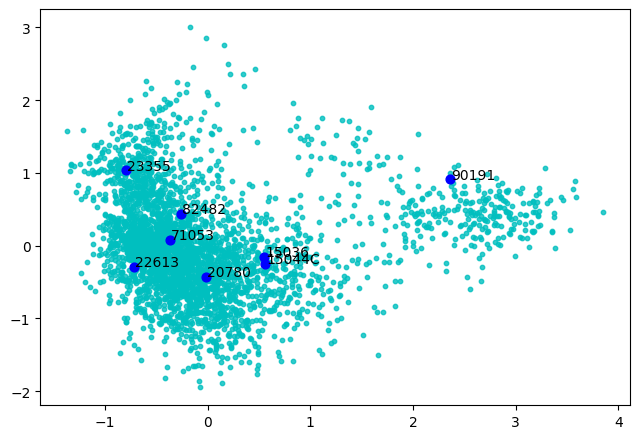

In [58]:
from sklearn.decomposition import PCA

lst_chk = ['22613','20780','23355','71053','90191','82482','15036','15044C'] 

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(6.5+0, 4.5+0))
plt.scatter(result[:, 0], result[:, 1], s=10, alpha=.8, c='c')

for i, label in enumerate(labels):
    if label in lst_chk:
        plt.scatter(result[i][0], result[i][1], s=40, c='b')
        plt.annotate(label, xy=(result[i, 0]+.01, result[i, 1]+.01))

plt.tight_layout()
plt.show()